In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px

df_mus= pd.read_csv('../source/data/liste-officielle-musees_clean.csv', sep =';')
df_mus


,Unnamed: 0,Identifiant Muséofile,Région administrative,Département,Commune,Nom officiel du musée,Code Postal,URL,Latitude,Longitude
0,0,M0967,Auvergne-Rhône-Alpes,Ain,Lochieu,musée du Bugey-Valromey,1260.0,patrimoines.ain.fr/n/musee-du-bugey-valromey/n...,"45,930633","5,727664"
1,1,M0964,Auvergne-Rhône-Alpes,Ain,Bourg-en-Bresse,musées des pays de l'Ain,1000.0,www.ain.fr/solutions-services-infos-pratiques/...,"46,196543","5,219217"
2,2,M0965,Auvergne-Rhône-Alpes,Ain,Briord,musée de la société d'histoire et d'archéologie,1470.0,patrimoines.ain.fr/n/musee-d-archeologie-de-br...,"45,781653","5,458569"
3,3,M0971,Auvergne-Rhône-Alpes,Ain,Pont-de-Vaux,musée Chintreuil,1190.0,www.musee-chintreuil.com/,"46,430076","4,938125"
4,5,M0966,Auvergne-Rhône-Alpes,Ain,Izernore,musée archéologique,1580.0,www.archeologie-izernore.com/pages/musee_histo...,"46,219853","5,555588"
...,...,...,...,...,...,...,...,...,...,...
1131,1215,M7059,Territoires et départements d'outre-mer,Martinique,Saint-Pierre-de-la-Martinique,musée vulcanologique,97250.0,saintpierre-martinique.fr/musee-franck-perret/,"14,743103","-61,175994"
1132,1216,M1081,Territoires et départements d'outre-mer,Martinique,Rivière-Pilote,écomusée de la Martinique,97211.0,www.martinique.org/node/24376/PCUMAR972V5000OU...,"14,463029","-60,909569"
1133,1218,M1181,Territoires et départements d'outre-mer,Martinique,Fort-de-France,musée du Père Pinchon,97200.0,www.martinique.org/node/24376/PCUMAR972V5042NH...,"14,649226","-61,070648"
1134,1219,M1209,Territoires et départements d'outre-mer,Mayotte,Mayotte,MuMa - musée de Mayotte,97615.0,www.cg976.fr/actualite/355/le-musee-de-mayotte...,"-12,774184","45,282721"


In [2]:
df_mus=df_mus[['Département', 'Région administrative']]
df_mus

,Département,Région administrative
0,Ain,Auvergne-Rhône-Alpes
1,Ain,Auvergne-Rhône-Alpes
2,Ain,Auvergne-Rhône-Alpes
3,Ain,Auvergne-Rhône-Alpes
4,Ain,Auvergne-Rhône-Alpes
...,...,...
1131,Martinique,Territoires et départements d'outre-mer
1132,Martinique,Territoires et départements d'outre-mer
1133,Martinique,Territoires et départements d'outre-mer
1134,Mayotte,Territoires et départements d'outre-mer


In [3]:
df_mus = df_mus.groupby('Région administrative').size().reset_index(name='Nombre de musées')
df_mus

,Région administrative,Nombre de musées
0,Auvergne-Rhône-Alpes,129
1,Bourgogne-Franche-Comté,93
2,Bretagne,34
3,Centre-Val de Loire,57
4,Corse,9
5,Grand Est,116
6,Hauts-de-France,82
7,Normandie,87
8,Nouvelle-Aquitaine,97
9,Occitanie,121


In [4]:
df_pop = pd.read_csv('../source/data/Population France par dpt 2024.csv', sep =';')
# Remove spaces and convert columns to integers
for col in ['Total Homme', 'Total Femme', 'Total']:
    df_pop[col] = df_pop[col].str.replace(' ', '').astype(int)
df_pop

,Code département,Départements,Total Homme,Total Femme,Total
0,1,Ain,335768,343730,679498
1,2,Aisne,255520,266112,521632
2,3,Allier,160253,172455,332708
3,4,Alpes-de-Haute-Provence,81346,86815,168161
4,5,Hautes-Alpes,68668,72993,141661
...,...,...,...,...,...
96,971,Guadeloupe,172924,205637,378561
97,972,Martinique,159707,190218,349925
98,973,Guyane,142442,152943,295385
99,974,La Réunion,421072,464628,885700


In [5]:
df_reg = pd.read_csv('../source/data/departements-regions-france.csv', sep =',')
df_reg

,code_departement,nom_departement,code_region,nom_region
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...
96,971,Guadeloupe,1,Territoires et départements d'outre-mer
97,972,Martinique,2,Territoires et départements d'outre-mer
98,973,Guyane,3,Territoires et départements d'outre-mer
99,974,La Réunion,4,Territoires et départements d'outre-mer


In [6]:
df_pop_clean = pd.merge(df_pop, df_reg, left_on ='Départements', right_on = 'nom_departement')
                       
df_pop_clean = df_pop_clean[['Code département','Départements','Total Homme', 'Total Femme', 'Total','code_region', 'nom_region']]

df_pop_clean

,Code département,Départements,Total Homme,Total Femme,Total,code_region,nom_region
0,1,Ain,335768,343730,679498,84,Auvergne-Rhône-Alpes
1,2,Aisne,255520,266112,521632,32,Hauts-de-France
2,3,Allier,160253,172455,332708,84,Auvergne-Rhône-Alpes
3,4,Alpes-de-Haute-Provence,81346,86815,168161,93,Provence-Alpes-Côte d'Azur
4,5,Hautes-Alpes,68668,72993,141661,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...,...,...,...
96,971,Guadeloupe,172924,205637,378561,1,Territoires et départements d'outre-mer
97,972,Martinique,159707,190218,349925,2,Territoires et départements d'outre-mer
98,973,Guyane,142442,152943,295385,3,Territoires et départements d'outre-mer
99,974,La Réunion,421072,464628,885700,4,Territoires et départements d'outre-mer


In [7]:
df_pop_reg_clean = df_pop_clean[['Total Homme', 'Total Femme', 'Total','code_region', 'nom_region']]

df_pop_reg_clean

,Total Homme,Total Femme,Total,code_region,nom_region
0,335768,343730,679498,84,Auvergne-Rhône-Alpes
1,255520,266112,521632,32,Hauts-de-France
2,160253,172455,332708,84,Auvergne-Rhône-Alpes
3,81346,86815,168161,93,Provence-Alpes-Côte d'Azur
4,68668,72993,141661,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...,...
96,172924,205637,378561,1,Territoires et départements d'outre-mer
97,159707,190218,349925,2,Territoires et départements d'outre-mer
98,142442,152943,295385,3,Territoires et départements d'outre-mer
99,421072,464628,885700,4,Territoires et départements d'outre-mer


In [8]:
df_pop_reg_clean = df_pop_reg_clean.groupby('nom_region').sum().reset_index()
df_pop_reg_clean

,nom_region,Total Homme,Total Femme,Total,code_region
0,Auvergne-Rhône-Alpes,4012350,4223573,8235923,1008
1,Bourgogne-Franche-Comté,1362040,1429679,2791719,216
2,Bretagne,1682034,1770989,3453023,212
3,Centre-Val de Loire,1251595,1321700,2573295,144
4,Corse,172277,183251,355528,188
5,Grand Est,2718206,2850505,5568711,440
6,Hauts-de-France,2901724,3082099,5983823,160
7,Normandie,1612697,1714380,3327077,140
8,Nouvelle-Aquitaine,2966799,3187973,6154772,900
9,Occitanie,2976720,3178009,6154729,988


In [9]:

df_pop_clean.to_csv('../source/data/population France par dpt et region_clean.csv', sep =';')

In [10]:
df_merge = pd.merge(df_pop_reg_clean, df_mus, left_on ='nom_region', right_on = 'Région administrative')
                       
df_merge = df_merge[['nom_region','Total Homme', 'Total Femme', 'Total','code_region', 'Nombre de musées']]

df_merge.sort_values(by='Total', ascending = False)

,nom_region,Total Homme,Total Femme,Total,code_region,Nombre de musées
13,Île-de-France,6008525,6411436,12419961,88,129
0,Auvergne-Rhône-Alpes,4012350,4223573,8235923,1008,129
8,Nouvelle-Aquitaine,2966799,3187973,6154772,900,97
9,Occitanie,2976720,3178009,6154729,988,121
6,Hauts-de-France,2901724,3082099,5983823,160,82
5,Grand Est,2718206,2850505,5568711,440,116
11,Provence-Alpes-Côte d'Azur,2486073,2711938,5198011,558,116
10,Pays de la Loire,1917615,2008774,3926389,260,49
2,Bretagne,1682034,1770989,3453023,212,34
7,Normandie,1612697,1714380,3327077,140,87


Text(0.5, 1.0, 'Population vs Nombre de Musées par Région (avec double axe Y)')

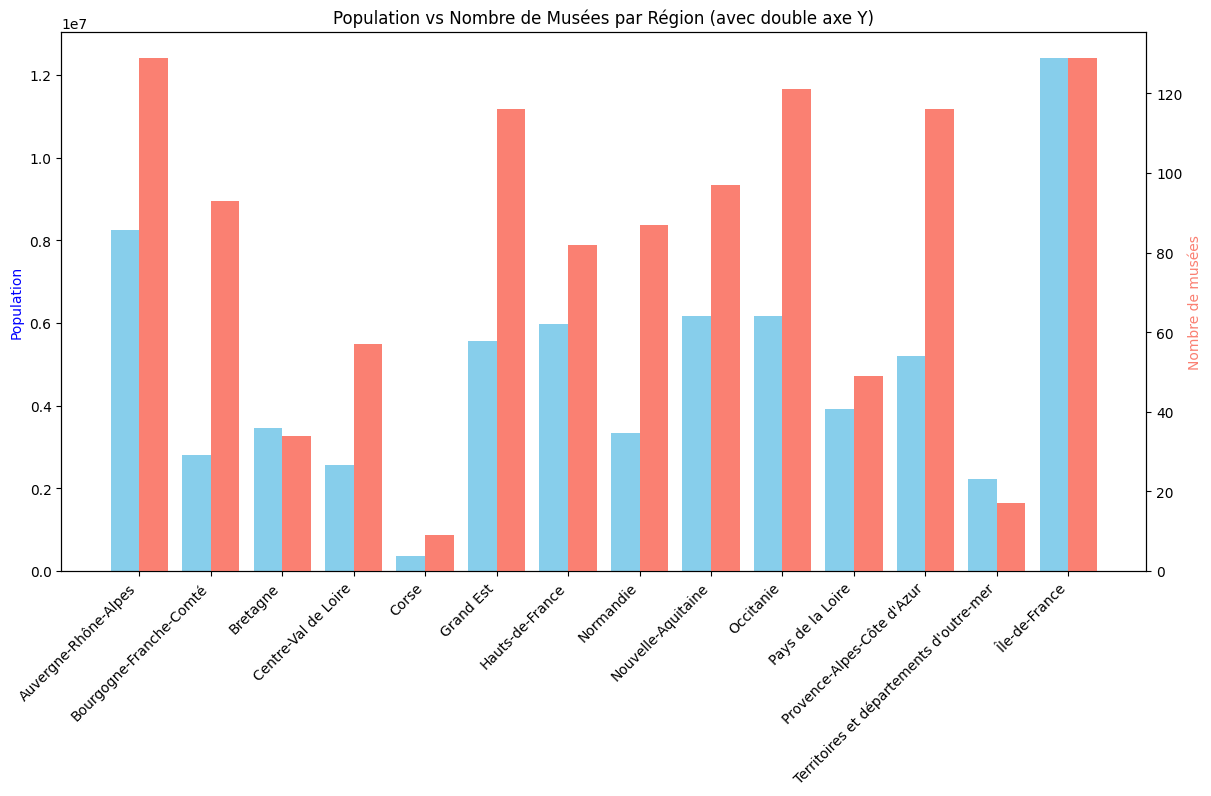

In [11]:

df = df_merge
# Position des barres
x = np.arange(len(df_merge))
width = 0.4

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Axe secondaire
ax2 = ax1.twinx()

# Barres population (axe gauche)
bars1 = ax1.bar(x - width/2, df['Total'], width, label='Population', color='skyblue')

# Barres musées (axe droit)
bars2 = ax2.bar(x + width/2, df_merge['Nombre de musées'], width, label='Nombre de musées', color='salmon')

# Configuration des axes
ax1.set_ylabel("Population", color='blue')
ax2.set_ylabel("Nombre de musées", color='salmon')
ax1.set_xticks(x)
ax1.set_xticklabels(df_merge['nom_region'], rotation=45, ha='right')
ax1.set_title("Population vs Nombre de Musées par Région (avec double axe Y)")

In [12]:

df_BLEC = pd.read_csv('../source/data/base-des-lieux-et-des-equipements-culturels_clean.csv', sep =';')
df_BLEC =df_BLEC[['Type équipement ou lieu','Demographie_AP']]
df_BLEC

,Type équipement ou lieu,Demographie_AP
0,Bibliothèque,Actif
1,Bibliothèque,Actif
2,Bibliothèque,Actif
3,Bibliothèque,Actif
4,Bibliothèque,Actif
...,...,...
88013,Monument,Actif
88014,Monument,Actif
88015,Monument,Actif
88016,Monument,Actif


In [13]:
df_BLEC = df_BLEC.groupby('Type équipement ou lieu').size().reset_index(name="Nombre d'équipement")
df_BLEC = df_BLEC.drop(index = [7, 9, 10, 11, 14, 15, 17, 19])
df_BLEC

,Type équipement ou lieu,Nombre d'équipement
0,Bibliothèque,16683
1,Centre culturel,22
2,Centre d'art,89
3,Centre de création artistique,108
4,Centre de création musicale,26
5,Cinéma,2183
6,Conservatoire,440
8,Librairie,4501
12,Musée,1856
13,Opéra,17


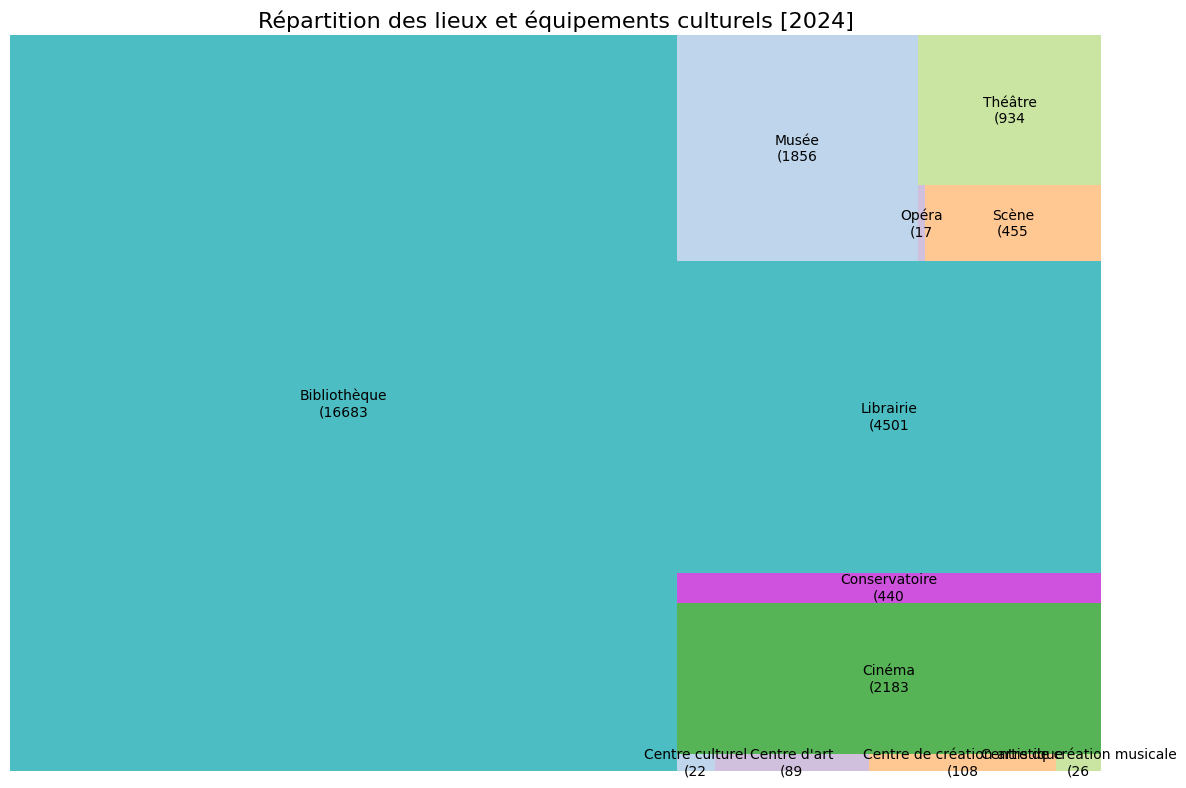

In [14]:
import matplotlib.pyplot as plt
import squarify 

labels = df_BLEC['Type équipement ou lieu']

values = df_BLEC["Nombre d'équipement"]

colors = [
    "#1fadb4", "#aecbe8", "#c5b0d5",
    "#ffbb78", "#bcdf8a", "#2ca02c", "#c227d6"
]


plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=values,
    label=[f"{l}\n({v}" for l, v in zip(labels, values)],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':10}
)
plt.axis('off')
plt.title("Répartition des lieux et équipements culturels [2024]", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
df_BLEC = pd.read_csv('../source/data/base-des-lieux-et-des-equipements-culturels_clean.csv', sep =';')
df_BLEC =df_BLEC[['Type équipement ou lieu','Région']]

In [16]:
df_BLEC = df_BLEC.groupby('Région').size().reset_index(name="Nombre d'équipement")
df_BLEC = df_BLEC.drop(index = [7, 9, 10, 11, 14, 15, 17, 19])

In [17]:
df_cine = pd.read_csv('../source/data/cinema_clean.csv', sep =';')
df_cine

,Nom_cinema,code_postal,commune,code_departement
0,NomEtab,DEPCOM,COMMUNE,DE
1,UGC NORMANDIE,75108,Paris 8e Arrondissement,75
2,BALZAC,75108,Paris 8e Arrondissement,75
3,ELYSEES LINCOLN,75108,Paris 8e Arrondissement,75
4,UGC OPERA,75109,Paris 9e Arrondissement,75
...,...,...,...,...
2049,CAROUSSEL,55545,Verdun,55
2050,CLUB 6,70550,Vesoul,70
2051,L'ARCHE,54580,Villerupt,54
2052,ALHAMBRA,88516,Vittel,88


In [18]:
df_cine = df_cine.groupby('code_departement').size().reset_index(name='Nombre de cinés')
df_cine = df_cine.drop(index= [96])

#jointure nombre de ciné et nom de region et  groupby par region

df_cine_reg = pd.merge(df_cine, df_reg, left_on ='code_departement', right_on = 'code_departement')
df_cine_reg = df_cine_reg[['nom_region', 'Nombre de cinés']]
df_cine_reg = df_cine_reg.groupby('nom_region').sum().reset_index()

# création ligne domtom
new_row = pd.DataFrame([{
    'nom_region': "Territoires et départements d'outre-mer",
    'Nombre de cinés': 0  
}])

# Ajout ligne domtom
df_cine_reg = pd.concat([df_cine_reg, new_row], ignore_index=True)

df_cine_reg

,nom_region,Nombre de cinés
0,Auvergne-Rhône-Alpes,320
1,Bourgogne-Franche-Comté,91
2,Bretagne,120
3,Centre-Val de Loire,73
4,Corse,19
5,Grand Est,124
6,Hauts-de-France,120
7,Normandie,103
8,Nouvelle-Aquitaine,230
9,Occitanie,217


In [19]:
# Décompte festival par région et remplacement des dom ton par nom de region

df_festival = pd.read_csv('../source/data/festivals_nettoye.csv', sep =';')

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_festival['Région principale de déroulement'] = df_festival['Région principale de déroulement'].replace(domtom, "Territoires et départements d'outre-mer")

df_festival = df_festival.groupby('Région principale de déroulement').size().reset_index(name='Nombre de festivals')

df_festival

,Région principale de déroulement,Nombre de festivals
0,Auvergne-Rhône-Alpes,947
1,Bourgogne-Franche-Comté,442
2,Bretagne,590
3,Centre-Val de Loire,357
4,Corse,69
5,Grand Est,469
6,Hauts-de-France,338
7,Normandie,267
8,Nouvelle-Aquitaine,828
9,Occitanie,903


In [20]:
df_biblio = pd.read_csv('../source/data/adresses_des_bibliotheques_publiques_prepared.csv', sep =',')

#detection de toutes les ligne NA
df_biblio.isna().sum()

#Detection de la lgne NA dans la colonne Dpt
df_biblio[df_biblio['Département'].isna()]

# Changement du NA par le nom de dpt correspondant au CP 973
df_biblio['Département'] = df_biblio['Département'].fillna('Guyane')


In [23]:
df_biblio

,Département,Nombre de bibliothèques
0,Ain,230
1,Aisne,129
2,Allier,215
3,Alpes-Maritimes,125
4,Alpes-de-Haute-Provence,94
...,...,...
98,Vendée,237
99,Vienne,192
100,Vosges,135
101,Yonne,115


In [22]:
df_biblio = pd.read_csv('../source/data/adresses_des_bibliotheques_publiques_prepared.csv', sep =',')

df_biblio = df_biblio.groupby('Département').size().reset_index(name='Nombre de bibliothèques')

#jointure bibliotheque _ région

df_biblio_reg = pd.merge(df_biblio, df_reg, left_on ='Département', right_on = 'nom_departement')

df_biblio_reg = df_biblio_reg[['Département', 'Nombre de bibliothèques', 'nom_region']]

df_biblio_reg

#changement nom de dpt domtom et groupby region

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_biblio_reg['nom_region'] = df_biblio_reg['nom_region'].replace(domtom, "Territoires et départements d'outre-mer")

df_biblio_reg = df_biblio_reg.groupby('nom_region').sum().reset_index()

df_biblio_reg = df_biblio_reg[['nom_region', 'Nombre de bibliothèques']]

df_biblio_reg

,nom_region,Nombre de bibliothèques
0,Auvergne-Rhône-Alpes,2611
1,Bourgogne-Franche-Comté,1069
2,Bretagne,1068
3,Centre-Val de Loire,796
4,Corse,52
5,Grand Est,1325
6,Hauts-de-France,1243
7,Normandie,694
8,Nouvelle-Aquitaine,1846
9,Occitanie,1982


In [ ]:
df_final = pd.merge(df_merge, df_cine_reg, left_on='nom_region', right_on ='nom_region')
df_final = pd.merge(df_final, df_festival, left_on='nom_region', right_on ='Région principale de déroulement')
df_final = pd.merge(df_final, df_biblio_reg, left_on='nom_region', right_on = 'nom_region')

df_final=df_final[['nom_region','code_region','Total','Nombre de musées', 'Nombre de cinés', 'Nombre de festivals','Nombre de bibliothèques']]


In [35]:
df_final

,nom_region,code_region,Total,Nombre de musées,Nombre de cinés,Nombre de festivals,Nombre de bibliothèques
0,Auvergne-Rhône-Alpes,1008,8235923,129,320,947,2611
1,Bourgogne-Franche-Comté,216,2791719,93,91,442,1069
2,Bretagne,212,3453023,34,120,590,1068
3,Centre-Val de Loire,144,2573295,57,73,357,796
4,Corse,188,355528,9,19,69,52
5,Grand Est,440,5568711,116,124,469,1325
6,Hauts-de-France,160,5983823,82,120,338,1243
7,Normandie,140,3327077,87,103,267,694
8,Nouvelle-Aquitaine,900,6154772,97,230,828,1846
9,Occitanie,988,6154729,121,217,903,1982
